In [30]:
import pandas as pd
import numpy as np
import random
import string

import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
data = pd.read_csv("hackathon_startup_week.csv")

In [32]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01 00:31:51,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01 00:41:45,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01 00:50:53,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01 01:32:28,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01 02:26:14,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43864 entries, 0 to 43863
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  43864 non-null  object 
 1   cc_num                 43864 non-null  int64  
 2   merchant               43864 non-null  object 
 3   category               43864 non-null  object 
 4   amt                    43864 non-null  float64
 5   trans_num              43864 non-null  object 
 6   unix_time              43864 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ MB


In [34]:
data['amt'] = data['amt'].astype(float)


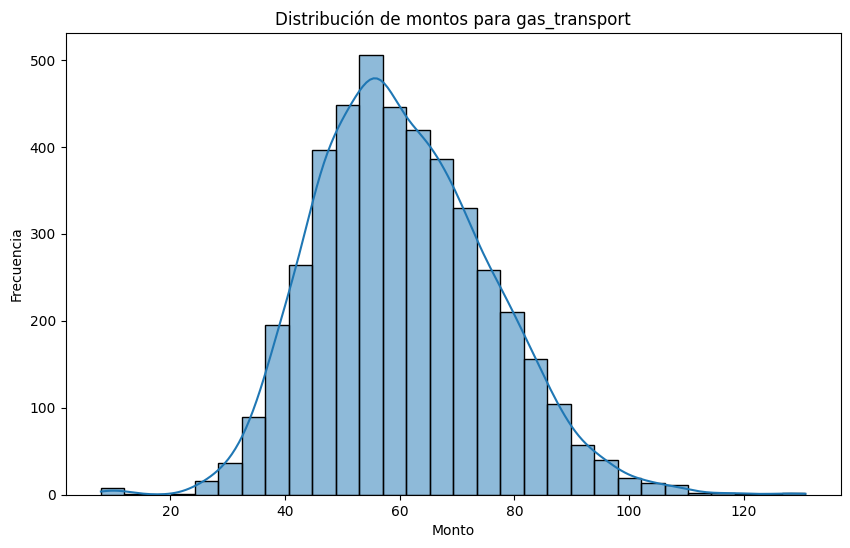

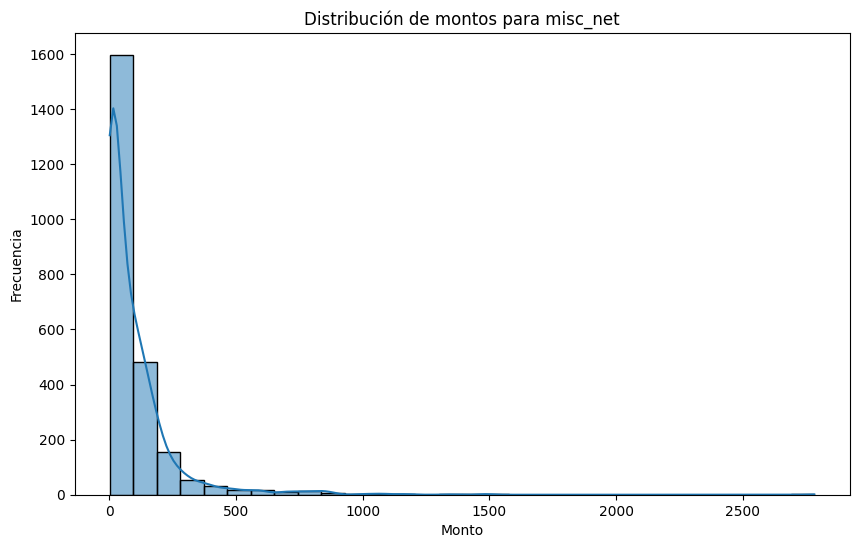

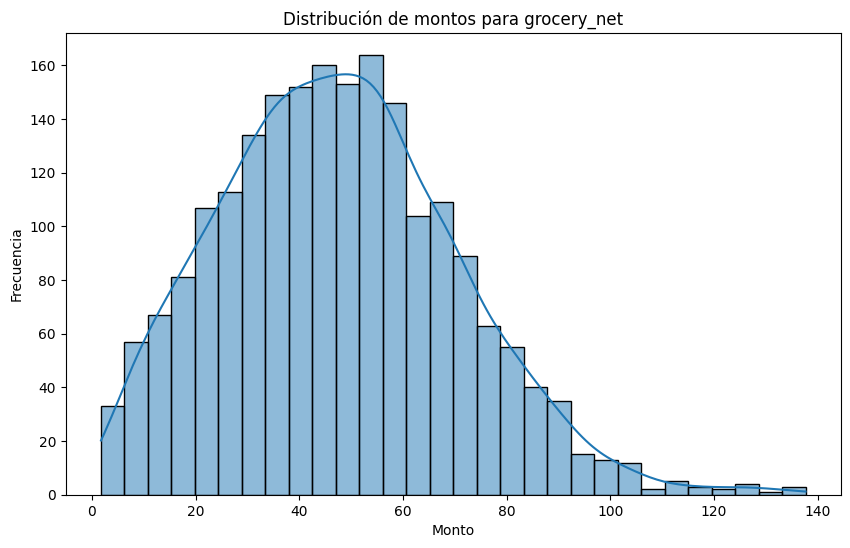

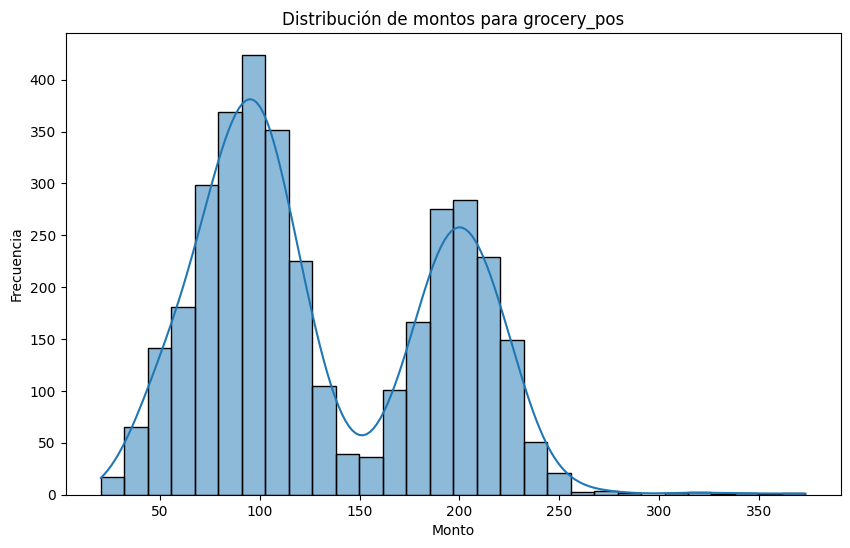

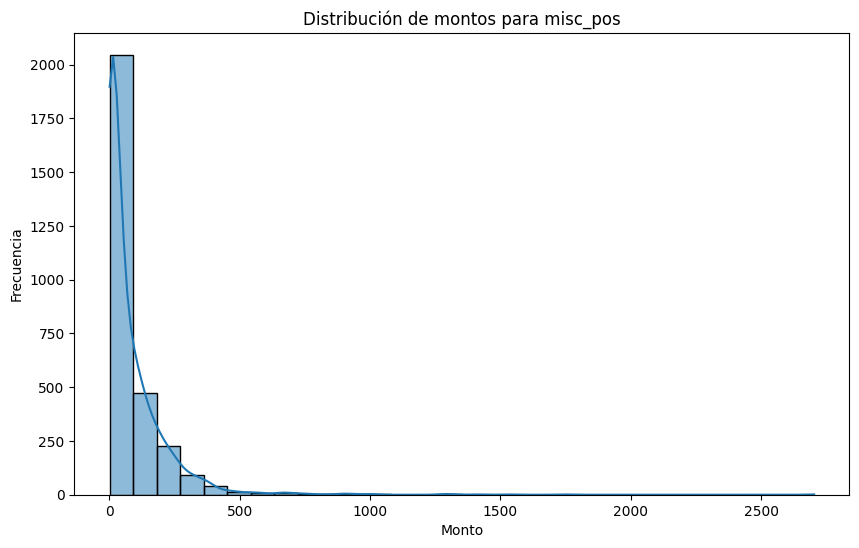

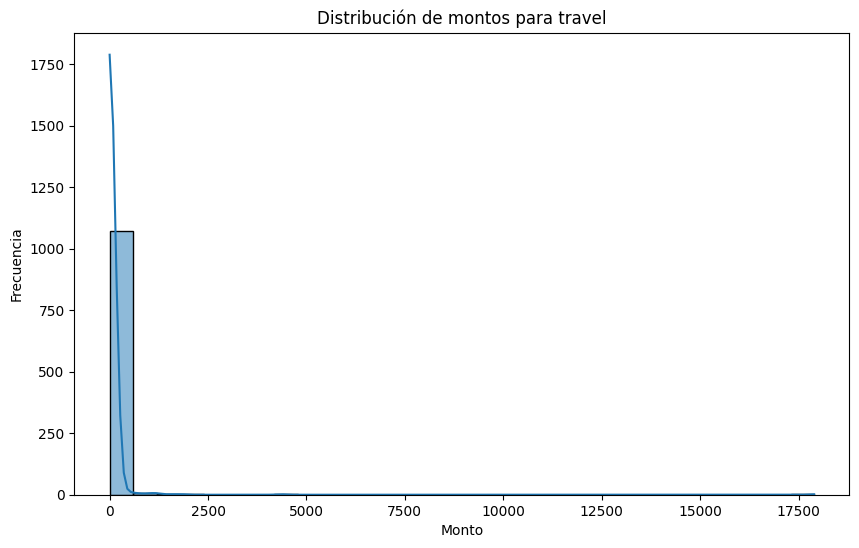

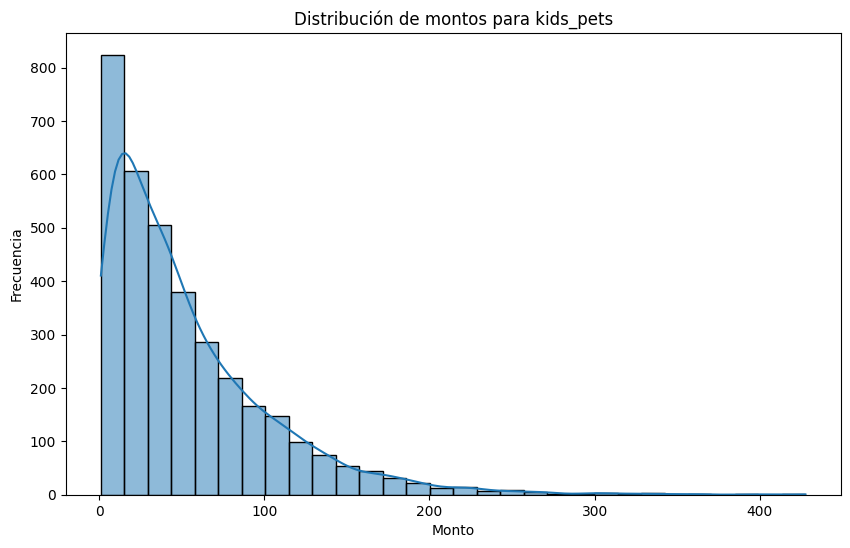

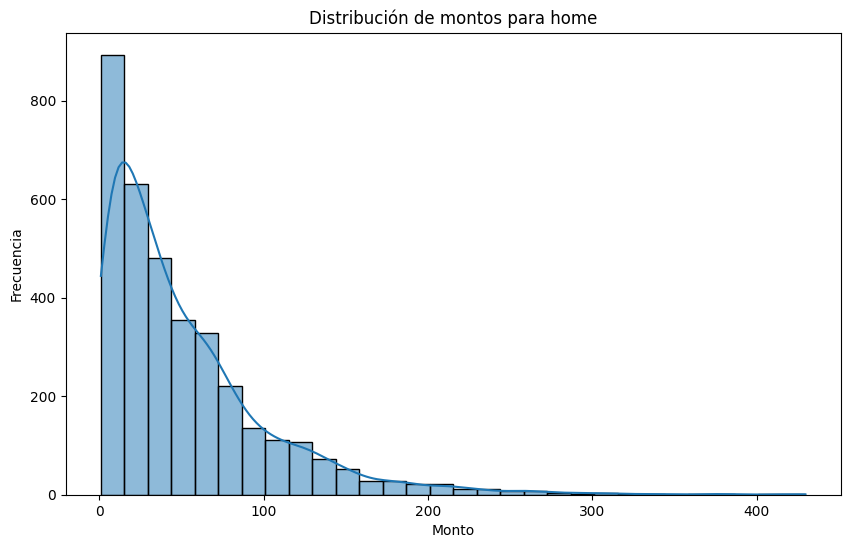

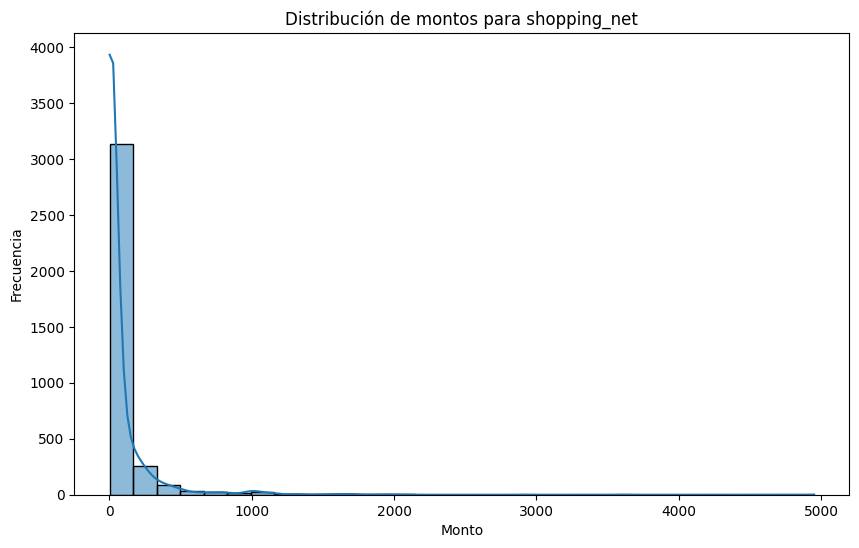

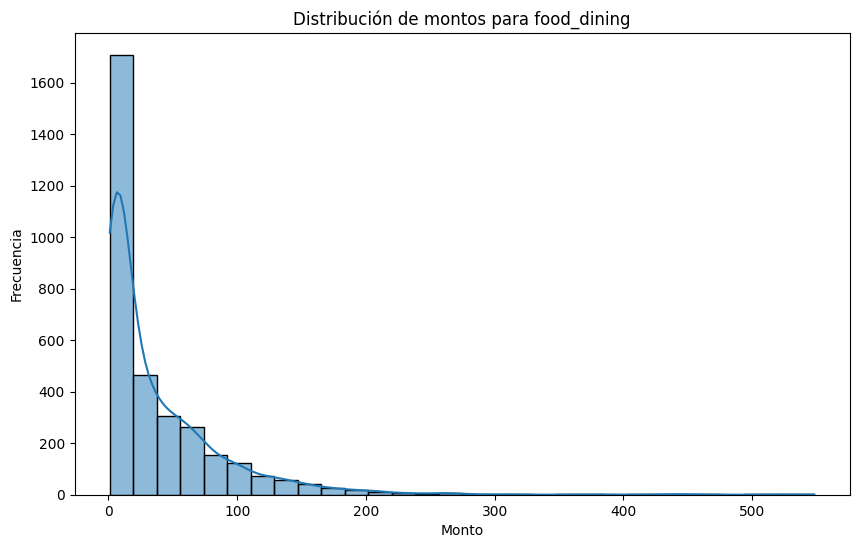

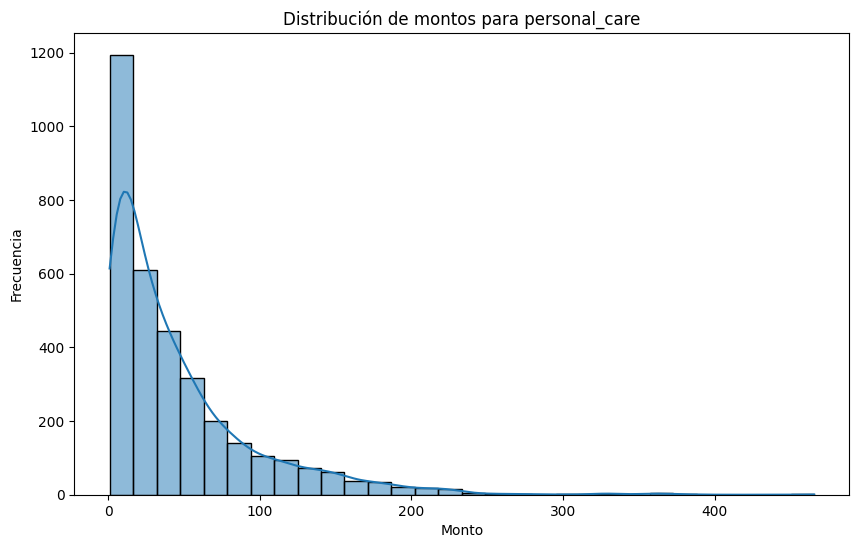

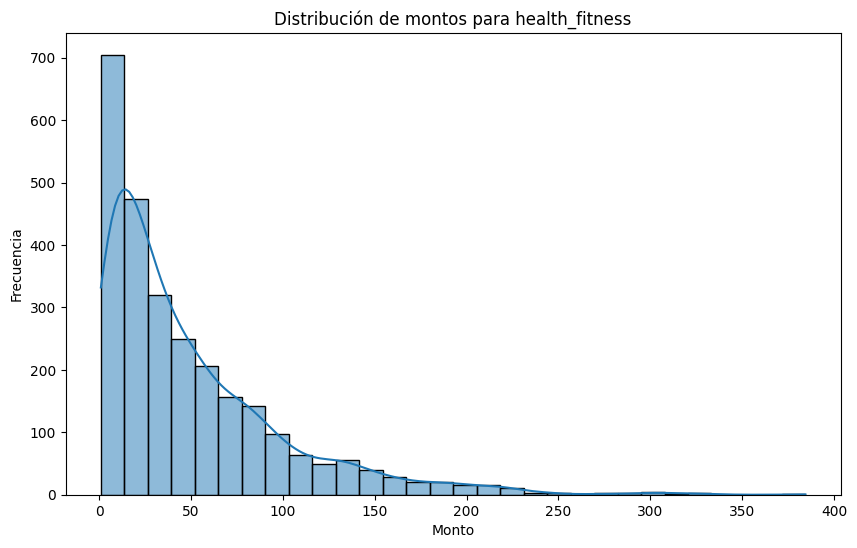

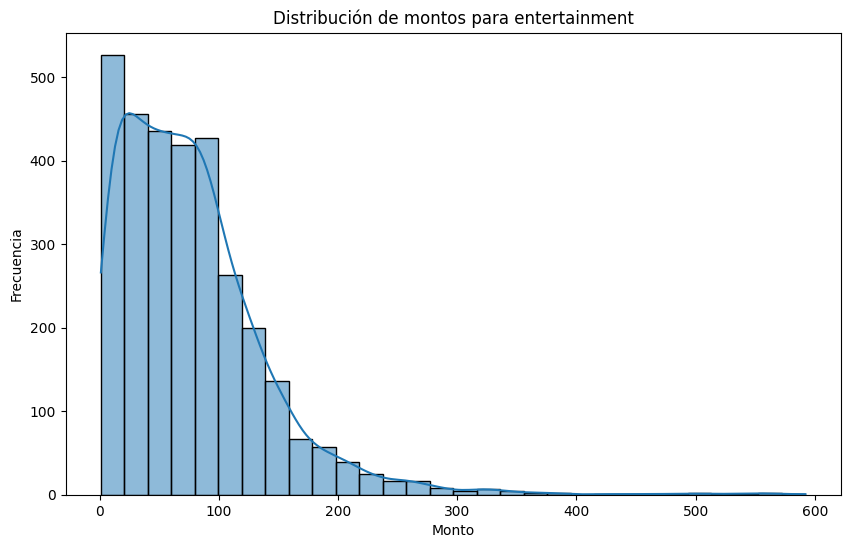

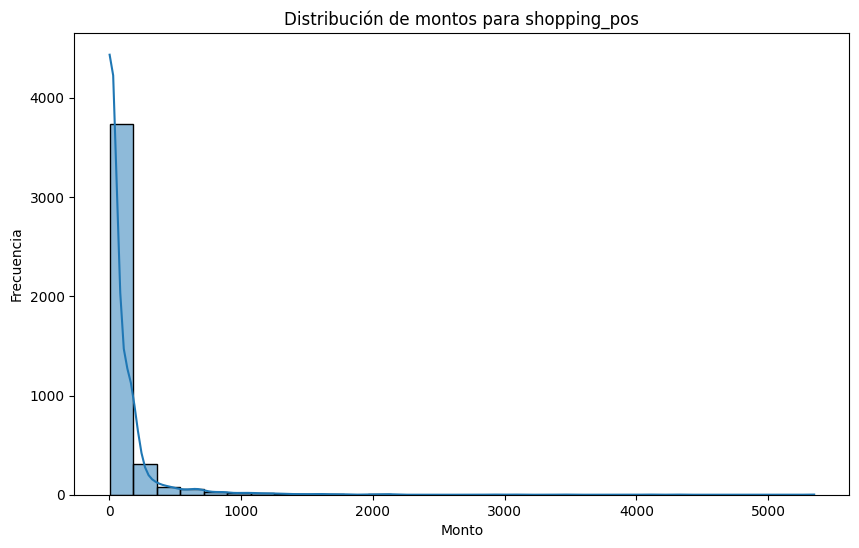

In [35]:
# Asumiendo que 'category' es la columna de categorías y 'amt' los montos
categories = data['category'].unique()
for category in categories:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data['category'] == category]['amt'], bins=30, kde=True)
    plt.title(f'Distribución de montos para {category}')
    plt.xlabel('Monto')
    plt.ylabel('Frecuencia')
    plt.show()


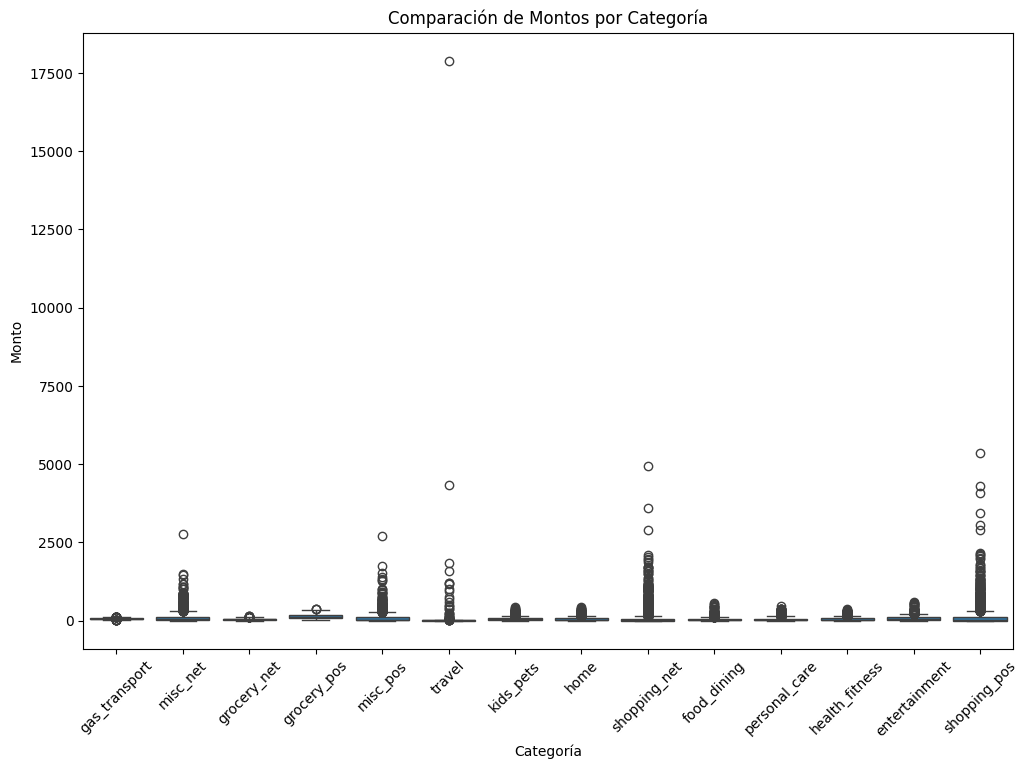

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='amt', data=data)
plt.xticks(rotation=45)
plt.title('Comparación de Montos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto')
plt.show()


In [37]:
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"]).dt.date
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [38]:
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')


In [39]:
data['category'] = data['category'].astype('category')


In [40]:
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')

In [41]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'trans_num', 'unix_time'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43864 entries, 0 to 43863
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   trans_date_trans_time  43864 non-null  object  
 1   cc_num                 43864 non-null  int64   
 2   merchant               43864 non-null  object  
 3   category               43864 non-null  category
 4   amt                    43864 non-null  float64 
 5   trans_num              43864 non-null  object  
 6   unix_time              43864 non-null  int64   
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 2.1+ MB


In [43]:
# Agrupar por número de tarjeta y calcular la mediana de los montos
median_spending_by_card = data.groupby('cc_num')['amt'].median().reset_index()

# Mostrar los resultados
median_spending_by_card.sort_values(by="amt", ascending=False)

,cc_num,amt
3,4586810168620942,55.920
6,6011438889172900,55.180
7,6538441737335434,54.180
1,344709867813900,53.530
8,6538891242532018,52.295
9,4512828414983801773,36.035
5,4904681492230012,35.125
4,4642255475285942,34.780
0,30270432095985,33.480
2,4364010865167176,21.490


In [44]:
# Generar 10 nuevos cc_num
new_cc_nums = np.arange(data['cc_num'].max() + 1, data['cc_num'].max() + 11)

# Definir el número total de nuevas transacciones a generar
total_new_transactions = 50000
num_samples_per_card = total_new_transactions // len(new_cc_nums)  # Número de transacciones por nuevo cc_num

new_transactions = pd.DataFrame()

def generate_random_trans_num():
    """Genera un número de transacción único de 32 caracteres combinando letras y números."""
    # Generar una mezcla de letras minúsculas y números hasta alcanzar 32 caracteres
    characters = string.ascii_lowercase + string.digits  # Letras minúsculas y dígitos
    return ''.join(random.choices(characters, k=32))

# Ejemplo de cómo usar la función para ver un trans_num generado
random_trans_num = generate_random_trans_num()
print("Ejemplo de trans_num generado:", random_trans_num)

for cc_num in new_cc_nums:
    sampled_data = data.sample(num_samples_per_card, replace=True).reset_index(drop=True)
    sampled_data['cc_num'] = cc_num  # Asignar el nuevo cc_num a estas transacciones replicadas
    
    # Modificar los montos añadiendo una variación aleatoria del -5% a +5%
    sampled_data['amt'] = sampled_data['amt'].apply(lambda x: x * np.random.uniform(0.95, 1.05))
    
    # Generar trans_num únicos para cada nueva transacción
    sampled_data['trans_num'] = [generate_random_trans_num() for _ in range(num_samples_per_card)]
    
    new_transactions = pd.concat([new_transactions, sampled_data], ignore_index=True)

# Añadir estos datos al DataFrame original
data = pd.concat([data, new_transactions], ignore_index=True)

print(data.tail())

Ejemplo de trans_num generado: krok4sbdwykax5w4q861g37hh7mqyfbs
      trans_date_trans_time               cc_num  \
93859            2020-02-27  4512828414983801783   
93860            2020-07-17  4512828414983801783   
93861            2020-12-27  4512828414983801783   
93862            2020-01-13  4512828414983801783   
93863            2020-07-05  4512828414983801783   

                                 merchant       category         amt  \
93859                     Friesen-D'Amore  gas_transport   50.686030   
93860  Rutherford, Homenick and Bergstrom    grocery_net   66.907127   
93861                        Schiller Ltd  personal_care   26.800070   
93862                      Abbott-Steuber  personal_care    3.813568   
93863                      Padberg-Rogahn  entertainment  100.156928   

                              trans_num   unix_time  
93859  2ovbfxt6gc5gln08616jc8ykbxxhztjo  1361932301  
93860  ehp7to1r1znju5rxkcugpis7tfn0dgly  1374034643  
93861  urud0z01otui52s3bl0xo

In [45]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,trans_num,unix_time
0,2019-01-01,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911
1,2019-01-01,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505
2,2019-01-01,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053
3,2019-01-01,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548
4,2019-01-01,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774


In [46]:
# Convertir 'trans_date_trans_time' a datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extraer la fecha como datetime
data['date'] = data['trans_date_trans_time'].dt.date

# Extraer la hora, pero conservarla en formato datetime para posibles operaciones de tiempo
data['time'] = data['trans_date_trans_time'].dt.strftime('%H:%M:%S')

# Eliminar la columna original 'trans_date_trans_time'
data.drop('trans_date_trans_time', axis=1, inplace=True)

# Convertir 'date' de nuevo a datetime para que sea más funcional en pandas
data['date'] = pd.to_datetime(data['date'])

data.head(5)


,cc_num,merchant,category,amt,trans_num,unix_time,date,time
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,1325377911,2019-01-01,00:00:00
1,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,1325378505,2019-01-01,00:00:00
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,1325379053,2019-01-01,00:00:00
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,1325381548,2019-01-01,00:00:00
4,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,1325384774,2019-01-01,00:00:00


In [47]:
df = pd.read_csv("new.csv")

In [48]:
df.head()

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13,47238da5b40d126c8abea40a857c7809,2019-01-01,00:31:51,1
1,4642255475285942,Huel-Langworth,misc_net,177.57,048dc7fc7ae8efd51f59f7176e6a8bd7,2019-01-01,00:41:45,1
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16,514a1b5251ca91aeab8994cf6253f04b,2019-01-01,00:50:53,1
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66,895bfdf48e8c52d12f11b180712438fa,2019-01-01,01:32:28,1
4,4364010865167176,Huels-Hahn,gas_transport,61.99,56bf02cc990fffa7866794be63472528,2019-01-01,02:26:14,1


In [49]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amount', 'transaction_num',
       'transaction_date', 'transaction_time', 'expense_income'],
      dtype='object')

In [50]:
df = df[df['merchant'] != 'Enterprise']


In [51]:
df.tail()

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
93859,4512828414983801783,"Schroeder, Hauck and Treutel",entertainment,39.682694,d0x3wskj0coqh9bzks33y5lv29lsbt24,2019-05-26,16:03:51,1
93860,4512828414983801783,Ortiz Group,grocery_net,44.270760,ov1xg94kdv6my7b1f9zfrakn0i02fvyh,2019-04-09,04:23:42,1
93861,4512828414983801783,"Stroman, Hudson and Erdman",gas_transport,77.041791,3nalnd2emh20mqwgotihj5hlb6dh05f7,2019-10-07,06:46:17,1
93862,4512828414983801783,"Stroman, Hudson and Erdman",gas_transport,60.900211,qwfnacwmmnd0u6ngulx4yc505u102c1o,2020-12-15,05:06:24,1
93863,4512828414983801783,"Lind, Huel and McClure",gas_transport,72.150647,be43uepabs23ec7fprvf65dru2q4xeuw,2019-03-24,09:44:49,1


In [52]:
# Convertir la columna 'transaction_date' a datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [53]:
# Suma de los gastos por cc_num y mes
monthly_sums = df.groupby(['cc_num', df['transaction_date'].dt.to_period('M')])['amount'].sum().reset_index()
monthly_sums.rename(columns={'amount': 'total_monthly_spending'}, inplace=True)


In [54]:
# Calcular la mediana de los gastos mensuales sumados para cada cc_num
monthly_median_spending = monthly_sums.groupby('cc_num')['total_monthly_spending'].median().reset_index()
monthly_median_spending.rename(columns={'total_monthly_spending': 'median_monthly_spending'}, inplace=True)

In [55]:
print(monthly_sums.head())
print(monthly_median_spending.head())

           cc_num transaction_date  total_monthly_spending
0  30270432095985          2019-01                 6938.97
1  30270432095985          2019-02                 5291.79
2  30270432095985          2019-03                11452.81
3  30270432095985          2019-04                 9564.88
4  30270432095985          2019-05                 7247.34
             cc_num  median_monthly_spending
0    30270432095985                 9483.570
1   344709867813900                15093.545
2  4364010865167176                 7780.075
3  4586810168620942                12424.750
4  4642255475285942                10171.090


In [56]:
# # Calcular la suma de gastos por cc_num y mes
# monthly_sum = df.groupby(['cc_num', df['transaction_date'].dt.to_period('M')])['amount'].sum().reset_index()
# monthly_sum.rename(columns={'amount': 'total_spending'}, inplace=True)


# # Incrementar la media en un 20% para simular la nómina
# monthly_sum['simulated_salary'] = monthly_sum['total_spending'] * 1.20


In [57]:
# # Generar registros de nómina
# payroll_records = pd.DataFrame({
#     'cc_num': monthly_sum['cc_num'],
#     'merchant': 'Enterprise',
#     'category': 'Salary',
#     'amount': monthly_sum['simulated_salary'],
#     'transaction_num': [generate_random_trans_num() for _ in range(len(monthly_sum))],  # Asumiendo que tienes esta función
#     'transaction_date': monthly_sum['transaction_date'].dt.start_time,
#     'transaction_time': '00:00:00',
#     'expense_income': 0  # Asumiendo que 0 representa ingresos
# })

# # Formatear la fecha correctamente para el inicio de cada mes
# payroll_records['transaction_date'] = payroll_records['transaction_date'].apply(lambda x: x.replace(day=1))


In [58]:
# # Concatenar los registros de nómina con los datos originales
# extended_data = pd.concat([df, payroll_records], ignore_index=True)

# # Opcional: Guardar los datos modificados a un nuevo archivo CSV
# extended_data.to_csv('new.csv', index=False)


In [59]:
# extended_data

In [60]:
monthly_expenses = df.groupby(['cc_num', df['transaction_date'].dt.to_period('M')])['amount'].sum().reset_index()
monthly_expenses.rename(columns={'amount': 'total_spending'}, inplace=True)

In [61]:
# Encontrar el máximo gasto mensual por cada cc_num
max_spending = monthly_expenses.groupby('cc_num')['total_spending'].max().reset_index()
max_spending.rename(columns={'total_spending': 'max_spending'}, inplace=True)

# Incrementar este gasto máximo en un 30% para establecer la nómina
max_spending['nominal_salary'] = max_spending['max_spending'] * 1.30

In [62]:
# Generar registros de nómina
payroll_records = pd.DataFrame({
    'cc_num': max_spending['cc_num'],
    'merchant': 'Enterprise',
    'category': 'Salary',
    'amount': max_spending['nominal_salary'],
    'transaction_num': [generate_random_trans_num() for _ in range(len(max_spending))],
    'transaction_date': pd.Timestamp('2021-01-01'),  # Utiliza una fecha fija para simplificar
    'transaction_time': '00:00:00',
    'expense_income': 0  # Asumiendo que 0 representa ingresos
})


In [63]:
payroll_records.value_counts()

payroll_records.to_csv('payroll_records.csv', index=False)

In [64]:
# Generar rango de fechas desde 2019-01-01 hasta 2020-12-01
date_range = pd.date_range(start='2019-01-01', end='2020-12-01', freq='MS')


In [65]:
# Suponiendo que max_spending contiene la columna 'nominal_salary' para cada cc_num
num_dates = len(date_range)
num_cc_nums = len(max_spending)

# Repetir cada cc_num para cada fecha en el rango de fechas
cc_nums = np.repeat(max_spending['cc_num'], num_dates)

# Repetir la nómina calculada para cada fecha en el rango de fechas
salaries = np.repeat(max_spending['nominal_salary'], num_dates)

# Repetir las fechas para cada cc_num
dates = np.tile(date_range, num_cc_nums)

# Suponiendo que tienes una función generate_random_trans_num() que genera un ID único
def generate_random_trans_num():
    """Genera un número de transacción único de 32 caracteres combinando letras y números."""
    characters = string.ascii_lowercase + string.digits  # Letras minúsculas y dígitos
    return ''.join(random.choices(characters, k=32))

# Crear DataFrame de registros de nómina
payroll_records = pd.DataFrame({
    'cc_num': cc_nums,
    'merchant': 'Enterprise',
    'category': 'Salary',
    'amount': salaries,
    'transaction_num': [generate_random_trans_num() for _ in range(num_dates * num_cc_nums)],
    'transaction_date': dates,
    'transaction_time': '00:00:00',
    'expense_income': 0  # Asumiendo que 0 representa ingresos
})


In [66]:
extended_data = pd.concat([df, payroll_records], ignore_index=True)
extended_data

,cc_num,merchant,category,amount,transaction_num,transaction_date,transaction_time,expense_income
0,4642255475285942,Ledner-Pfannerstill,gas_transport,102.13000,47238da5b40d126c8abea40a857c7809,2019-01-01,00:31:51,1
1,4642255475285942,Huel-Langworth,misc_net,177.57000,048dc7fc7ae8efd51f59f7176e6a8bd7,2019-01-01,00:41:45,1
2,4512828414983801773,Jaskolski-Dibbert,grocery_net,16.16000,514a1b5251ca91aeab8994cf6253f04b,2019-01-01,00:50:53,1
3,30270432095985,"Herman, Treutel and Dickens",misc_net,3.66000,895bfdf48e8c52d12f11b180712438fa,2019-01-01,01:32:28,1
4,4364010865167176,Huels-Hahn,gas_transport,61.99000,56bf02cc990fffa7866794be63472528,2019-01-01,02:26:14,1
...,...,...,...,...,...,...,...,...
94339,4512828414983801783,Enterprise,Salary,35450.05666,hphs3kicmx35p7swt8st00m2u4q90mkb,2020-08-01,00:00:00,0
94340,4512828414983801783,Enterprise,Salary,35450.05666,etruxystq41y0d062gow2ue9q2o3liwm,2020-09-01,00:00:00,0
94341,4512828414983801783,Enterprise,Salary,35450.05666,6vii1pxukdcv209g3v3t4i2jf1dz57zg,2020-10-01,00:00:00,0
94342,4512828414983801783,Enterprise,Salary,35450.05666,m3nkvdtz7hgvacrhwnc7px314agnvioi,2020-11-01,00:00:00,0


In [71]:
len(df["cc_num"].value_counts())

20

In [68]:
# Verificar los datos de nómina
print(payroll_records.head())
print(payroll_records.tail())

# Opcional: Guardar los registros de nómina en un archivo CSV
extended_data.to_csv('new2.csv', index=False)


           cc_num    merchant category     amount  \
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   
0  30270432095985  Enterprise   Salary  27367.665   

                    transaction_num transaction_date transaction_time  \
0  yxzmpe4gal045dw8o0x3v31q0z0obmkl       2019-01-01         00:00:00   
0  483h1h60guo1ji31bgdp308bh8ziymag       2019-02-01         00:00:00   
0  alw44906avnulkt7rigip8xggmokolih       2019-03-01         00:00:00   
0  m01rgov9crl8q8s0ex06afp0iyauxuqw       2019-04-01         00:00:00   
0  rvms4gz7yd0z0f8zl7e9t4xb7187iys8       2019-05-01         00:00:00   

   expense_income  
0               0  
0               0  
0               0  
0               0  
0               0  
                 cc_num    merchant category       amount  \
19  4512828414983801783  Enterprise   Salary  35450.05666   
